## Predict Whether income of individual exceeds $50K/year or not based on attributes given

In [26]:
# Import the req libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

In [27]:
data=pd.read_csv(r'C:\Users\Gaumi\Downloads\archive (1)\adult.csv')
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [29]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [30]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [31]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [32]:
data.income.unique()

array(['<=50K', '>50K'], dtype=object)

In [33]:
data['income']=data['income'].map({'<=50K':0, '>50K':1})
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [34]:
data[data['workclass']== '?'][:5]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,0
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,0
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,1
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,0
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,0


In [35]:
data.replace('?',np.NaN,inplace=True)
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [36]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [37]:
data['workclass']=data['workclass'].fillna(method='bfill')
data['occupation']=data['occupation'].fillna(method='bfill')
data['native.country']=data['native.country'].fillna(method='pad')

In [38]:
data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [39]:
data.rename(columns={'education.num':'education_num',
       'marital.status':'marital_status',
       'capital.gain':'capital_gain', 'capital.loss':'capital_loss','hours.per.week':'hours_per_week', 'native.country':'native_country'},inplace=True)

In [40]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

## Seperate categorical and numerical features

In [41]:
Categorical=[i for i in data.columns if data[i].dtype == "O"]
Categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [42]:
Numerical =[i for i in data.columns if data[i].dtype == "int64"]
Numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'income']

In [43]:
## Graph for Numerical Variable

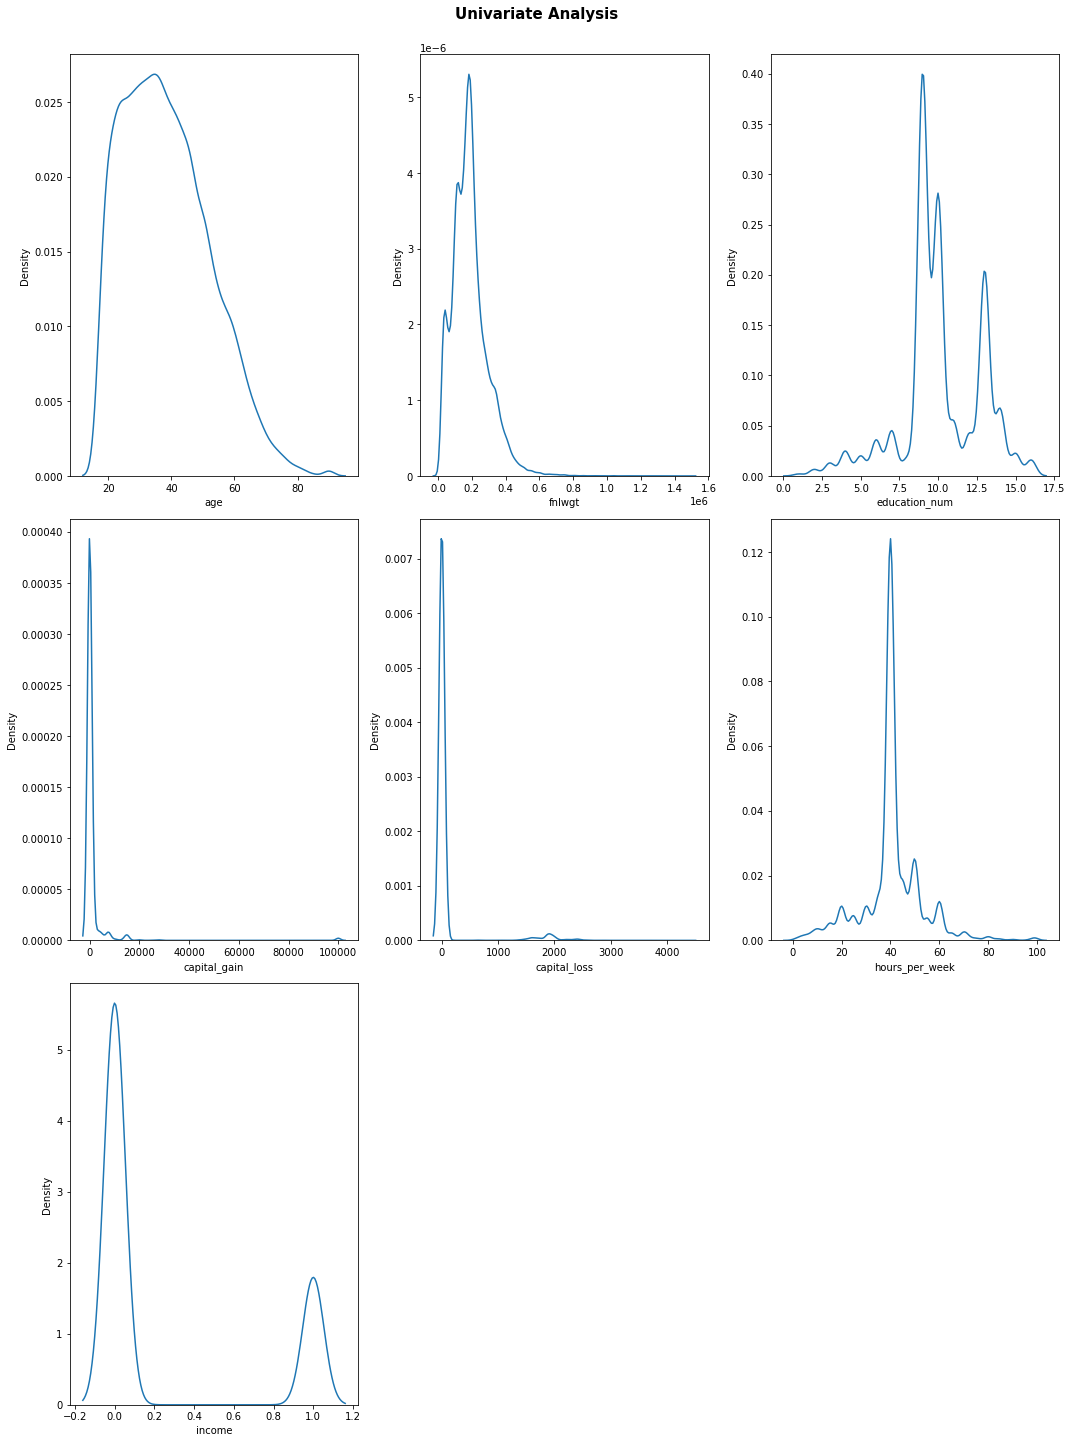

In [44]:
plt.figure(figsize=(15,20))
plt.suptitle('Univariate Analysis',fontweight = "bold",fontsize=15,y = 1)
for i in range(0,len(Numerical)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(data[Numerical[i]])
    plt.tight_layout()

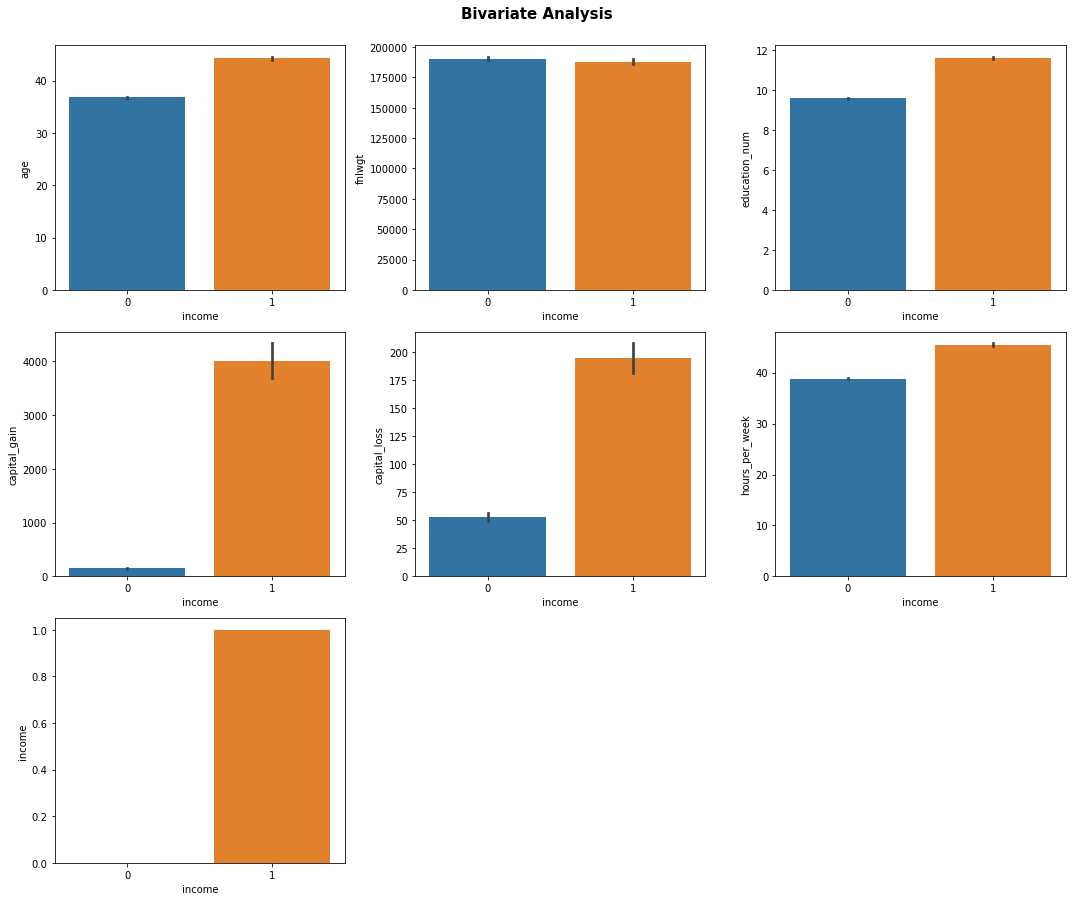

In [45]:
plt.figure(figsize=(15,20))
plt.suptitle('Bivariate Analysis',fontweight = "bold",fontsize=15,y = 1)
for i in range(0,len(Numerical)):
    plt.subplot(5,3,i+1)
    sns.barplot(x=data['income'],y=data[Numerical[i]])
    plt.tight_layout()

## Check distribution and outliers together

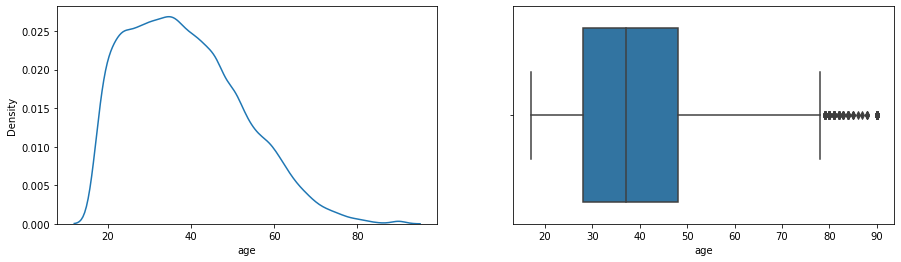

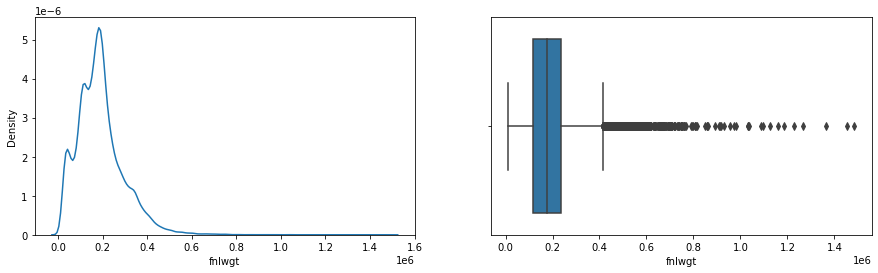

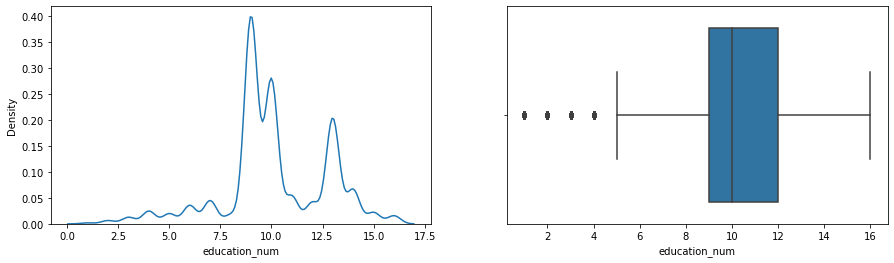

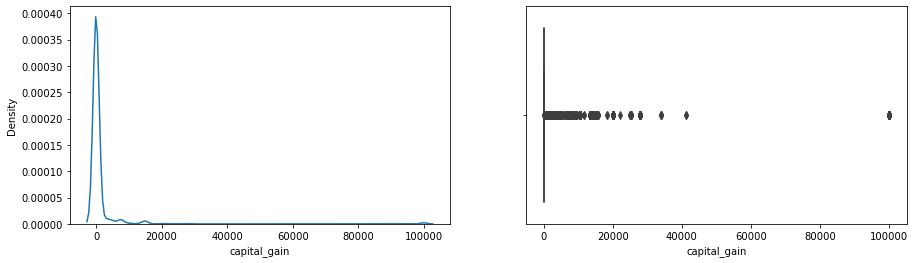

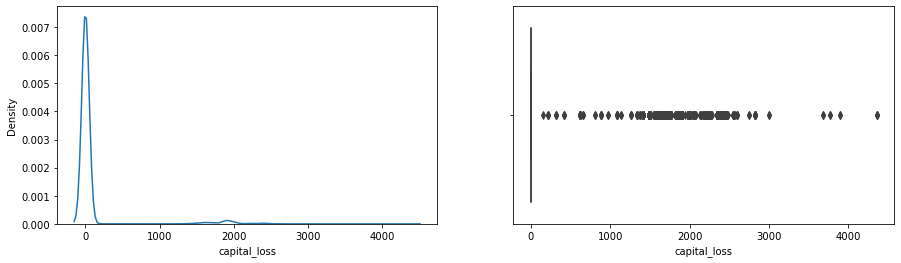

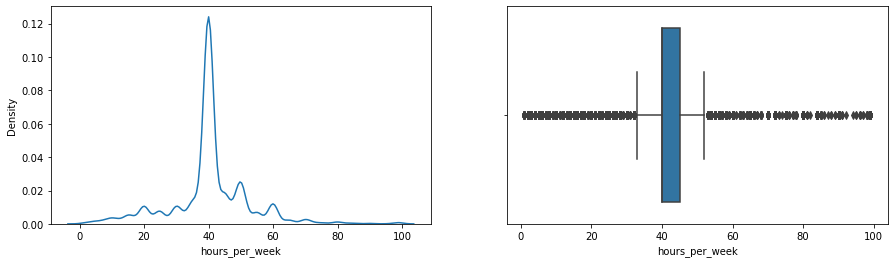

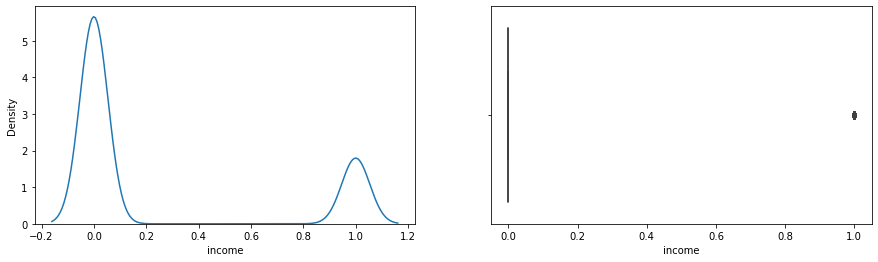

In [46]:
for i in Numerical:
    plt.figure(figsize=(15,4))
    plt.subplot(121)
    sns.kdeplot(x=data[i])
    
    plt.subplot(122)
    sns.boxplot(data[i])
    plt.show()

In [47]:
data1=data.copy()
data1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,77053,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Machine-op-inspct,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


In [48]:
Num=['age','fnlwgt','education_num','hours_per_week']
for i in Num:
    iqr=data[i].quantile(.75)-data[i].quantile(.25)
    lower=data[i].quantile(.25)-(1.5*iqr)
    upper=data[i].quantile(.75)+(1.5*iqr)
    data1[i]=np.where(data1[i]>upper,upper,data1[i])
    data1[i]=np.where(data1[i]<lower,lower,data1[i])
    

In [49]:
Numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'income']

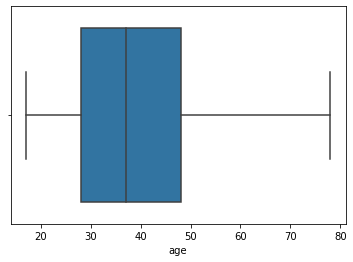

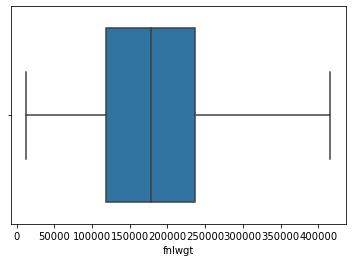

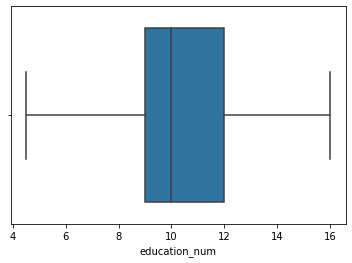

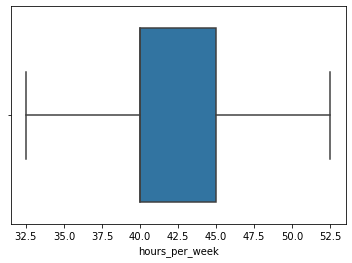

In [50]:
import warnings
warnings.filterwarnings('ignore')
for i in Num:
    sns.boxplot(data1[i])
    plt.show()

In [58]:
X=data1.iloc[:,:-1]
X

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,78.0,Private,77053.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40.0,United-States
1,78.0,Private,132870.0,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,32.5,United-States
2,66.0,Private,186061.0,Some-college,10.0,Widowed,Machine-op-inspct,Unmarried,Black,Female,0,4356,40.0,United-States
3,54.0,Private,140359.0,7th-8th,4.5,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40.0,United-States
4,41.0,Private,264663.0,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0,3900,40.0,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22.0,Private,310152.0,Some-college,10.0,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40.0,United-States
32557,27.0,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38.0,United-States
32558,40.0,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40.0,United-States
32559,58.0,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40.0,United-States


In [60]:
y=data1['income']
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

In [61]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education_num   32561 non-null  float64
 5   marital_status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital_gain    32561 non-null  int64  
 11  capital_loss    32561 non-null  int64  
 12  hours_per_week  32561 non-null  float64
 13  native_country  32561 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 3.5+ MB


In [65]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X[Categorical]=X[Categorical].apply(le.fit_transform)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  int64  
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  int64  
 4   education_num   32561 non-null  float64
 5   marital_status  32561 non-null  int64  
 6   occupation      32561 non-null  int64  
 7   relationship    32561 non-null  int64  
 8   race            32561 non-null  int64  
 9   sex             32561 non-null  int64  
 10  capital_gain    32561 non-null  int64  
 11  capital_loss    32561 non-null  int64  
 12  hours_per_week  32561 non-null  float64
 13  native_country  32561 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 3.5 MB


In [68]:
from sklearn.model_selection import GridSearchCV,train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y)
x_train.shape,y_train.shape


((24420, 14), (24420,))

## Decision tree

In [72]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [74]:
model.score(x_train,y_train)*100

99.995904995905

In [76]:
y_pre=model.predict(x_test)

In [99]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pre))
print('-----------------------')
print(classification_report(y_test,y_pre))
print(f'accuracy_score  {accuracy_score(y_test,y_pre)*100}')

[[5455  736]
 [ 752 1198]]
-----------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6191
           1       0.62      0.61      0.62      1950

    accuracy                           0.82      8141
   macro avg       0.75      0.75      0.75      8141
weighted avg       0.82      0.82      0.82      8141

accuracy_score  81.72214715636899


## Hyperparameter Tunning of decision Tree


In [85]:
grid_params={'criterion':['gini','entropy'],
    'max_depth': range(2,32,1),
    'min_samples_leaf': range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter':['best','random']}
grid=GridSearchCV(estimator=model,
                  param_grid=grid_params,scoring='neg_mean_squared_error',n_jobs=-1,cv=3,verbose=0)
grid.fit(x_train,y_train)
grid.best_params_


{'criterion': 'entropy',
 'max_depth': 8,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'splitter': 'best'}

In [96]:
grid_tree=DecisionTreeClassifier(criterion = "gini", max_depth= 8 , min_samples_leaf= 7, min_samples_split= 2 , splitter= "best")
grid_tree.fit(x_train,y_train)
y_pre_hy=grid_tree.predict(x_test)
print(f'accuracy_score  {accuracy_score(y_test,y_pre_hy)*100}')

accuracy_score  85.24751259059083


## Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pre_rfc=rfc.predict(x_test)
print(confusion_matrix(y_test,y_pre))
print('-----------------------')
print(classification_report(y_test,y_pre))
print(f'accuracy_score  {accuracy_score(y_test,y_pre)*100}')

[[5455  736]
 [ 752 1198]]
-----------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      6191
           1       0.62      0.61      0.62      1950

    accuracy                           0.82      8141
   macro avg       0.75      0.75      0.75      8141
weighted avg       0.82      0.82      0.82      8141

accuracy_score  81.72214715636899


In [111]:
rfc.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
grid_param = {
    'n_estimators':[90,100],
    'criterion':['gini','entropy'],
    'min_samples_leaf': range(1,5,1),
    'min_samples_split': range(2,10,1),
    'max_features': ['auto','log2']
}
grid_rfc=GridSearchCV(estimator=rfc,
                  param_grid=grid_params,n_jobs=-1,cv=3,verbose=0)
grid_rfc.fit(x_train,y_train)
grid_rfc.best_params_

In [117]:
rf_model_bestpara = RandomForestClassifier(criterion = 'gini',max_depth= 11,max_features='log2', min_samples_leaf= 1, 
                                           min_samples_split= 3, n_estimators=100)
rfc_hy=rf_model_bestpara.fit(x_train,y_train)
y_pre_rf_hy=rfc_hy.predict(x_test)
print(confusion_matrix(y_test,y_pre_rf_hy))
print('-----------------------')
print(classification_report(y_test,y_pre_rf_hy))
print(f'accuracy_score  {accuracy_score(y_test,y_pre_rf_hy)*100}')

[[5873  318]
 [ 866 1084]]
-----------------------
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6191
           1       0.77      0.56      0.65      1950

    accuracy                           0.85      8141
   macro avg       0.82      0.75      0.78      8141
weighted avg       0.85      0.85      0.85      8141

accuracy_score  85.45633214592802
